# Jupiter Notebook 
## for training of simple classifiers and interpretability methods

In [1]:
# load dataset into a pandas DataFrame
import pandas as pd
df = pd.read_csv("depression_detection_features.csv")
df.head()

,depression_label,frequency_of_speech,mean_length_of_speech,mean_word_length,flair_sentiment,flair_score,average_frequency_nouns,average_frequency_verbs,average_frequency_adjectives,average_frequency_adverbs,average_frequency_firstperson,speech_speed,unique_word_count,stop_word_frequency
0,0,77,4.181818,4.068323,0,0.898453,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,0,72,19.430556,3.961401,1,0.830033,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,0,99,6.151515,4.096880,1,0.613937,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,0,94,20.382979,3.914927,1,0.989942,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,0,80,12.400000,4.021169,0,0.990270,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611


In [2]:
df.columns

Index(['depression_label', 'frequency_of_speech', 'mean_length_of_speech',
       'mean_word_length', 'flair_sentiment', 'flair_score',
       'average_frequency_nouns', 'average_frequency_verbs',
       'average_frequency_adjectives', 'average_frequency_adverbs',
       'average_frequency_firstperson', 'speech_speed', 'unique_word_count',
       'stop_word_frequency'],
      dtype='object')

In [3]:
df = df.drop(columns=['frequency_of_speech', 'flair_score'])

In [4]:
# Check the total size of the dataset
df.shape

(219, 12)

In [5]:
# Check variable types
df.dtypes

depression_label                   int64
mean_length_of_speech            float64
mean_word_length                 float64
flair_sentiment                    int64
average_frequency_nouns          float64
average_frequency_verbs          float64
average_frequency_adjectives     float64
average_frequency_adverbs        float64
average_frequency_firstperson    float64
speech_speed                     float64
unique_word_count                  int64
stop_word_frequency                int64
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

depression_label                 0
mean_length_of_speech            0
mean_word_length                 0
flair_sentiment                  0
average_frequency_nouns          0
average_frequency_verbs          0
average_frequency_adjectives     0
average_frequency_adverbs        0
average_frequency_firstperson    0
speech_speed                     0
unique_word_count                0
stop_word_frequency              0
dtype: int64

# Checking for correlations

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

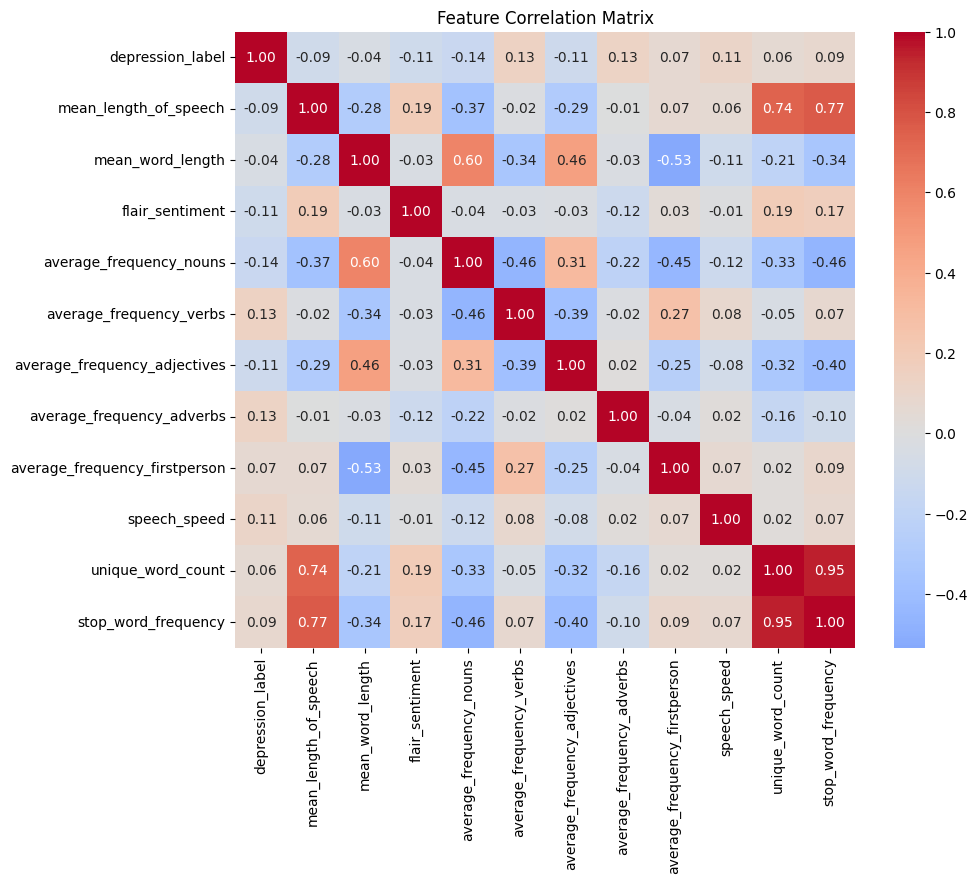

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Preparing the data for ML classification

Input features (all or a selection)
- frequency_of_speech
- mean_length_of_speech
- mean_word_length
- flair_sentiment
- flair_score
- average_frequency_nouns
- average_frequency_verbs
- average_frequency_adjectives
- average_frequency_adverbs
- average_frequency_firstperson
- speech_speed
- unique_word_count
- stop_word_frequency

Binary target class (could be changed, having different categories for depresion)
- depression_label (0 for no depression, 1 for depression)

In [9]:
import numpy as np

# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)

In [10]:
# Convert DataFrame to numpy array
numpy_array = df.values
print(numpy_array)

[[0.00000000e+00 4.18181818e+00 4.06832298e+00 ... 4.23795736e-01
  1.73000000e+02 1.74000000e+02]
 [0.00000000e+00 1.94305556e+01 3.96140100e+00 ... 1.05848528e+00
  3.64000000e+02 9.07000000e+02]
 [0.00000000e+00 6.15151515e+00 4.09688013e+00 ... 6.25064149e-01
  2.86000000e+02 3.30000000e+02]
 ...
 [0.00000000e+00 5.61445783e+00 4.26824034e+00 ... 2.70615563e+00
  2.15000000e+02 2.60000000e+02]
 [0.00000000e+00 8.56701031e+00 3.97352587e+00 ... 2.66859345e+00
  3.20000000e+02 4.97000000e+02]
 [0.00000000e+00 6.09909910e+00 3.89512555e+00 ... 6.65879807e-01
  2.70000000e+02 4.22000000e+02]]


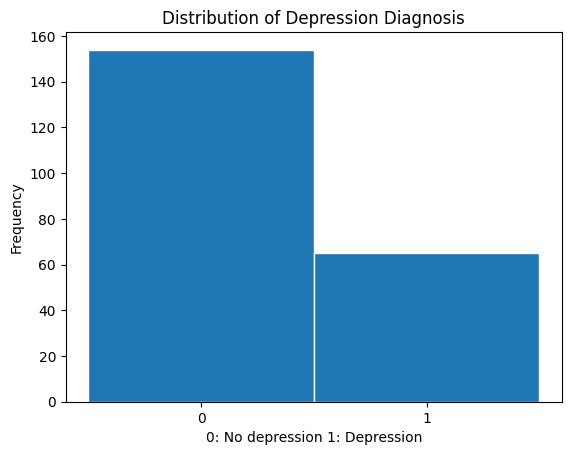

In [11]:
target_column = 'depression_label'

# Histogram for target class
plt.hist(df[target_column], bins=[-0.5, 0.5, 1.5], edgecolor='white')
plt.title('Distribution of Depression Diagnosis')
plt.xlabel('0: No depression 1: Depression')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Set x-ticks to show only 0 and 1
plt.show()

In [12]:
# Check for class imbalance
print(df[target_column].value_counts())

depression_label
0    154
1     65
Name: count, dtype: int64


In [13]:
# Code that separates data into features X and target variable y
X_array = df.drop([target_column], axis=1).values
y_array = df[target_column].values

### Stratified train-test partitioning
- generate X_train, X_test, y_train, y_test maintaining 20% in the test set
- additionally generate X_train_norm, X_test_norm for KNN and SVM classifier

*Explanation* of stratified train-test partitioning and its advantages:
- Stratified train-test partitioning involves splitting the dataset into train and test sets while maintaining the proportion of classes in each subset similar to that in the original dataset. 
- This is beneficial for datasets with unequal distribution ensuring both sets represent the class distribution accurately and improving model training and evaluation on minority classes.

In [14]:
from sklearn.model_selection import train_test_split

# Perform stratified train-test split with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X_array, 
                                                    y_array, 
                                                    test_size=0.2, 
                                                    stratify=y_array, 
                                                    random_state=RANDOM_SEED)

In [15]:
# Normalize the data for KNN and SVM

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Only the data with features is normalized, the class labels do not need normalization
X_array_normalized = scaler.fit_transform(X_array)

# Create splits from the normalized dataset.
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_array_normalized,
                                                              y_array,
                                                              test_size=0.2,
                                                              stratify=y_array, 
                                                              random_state=RANDOM_SEED)

### Model training

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


In [17]:
# Libraries for Cross-Validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

In [18]:
# Define cross-validation with StratifiedKFold (ensuring consistent splits)
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [19]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

### Random Forest (RF)

In [20]:
# Define the model
rf = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_SEED) # adjusts the weight of each class, making the model pay more attention to the minority class

# Define the parameter grid for random forest
param_grid_rf = {
    'n_estimators': [40, 50, 75, 100, 200], # number of trees
    'max_depth': [None, 5, 10, 15], # maximum depth of each tree
    'min_samples_split': [20, 30, 40, 50] # minimum samples required to split a node
}



# Set up GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=cv_folds, scoring=scoring, refit='f1')
grid_search_rf.fit(X_train, y_train)

# Output the best parameters based on F1 score and display all metrics
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# View the scores for all metrics
cv_results = grid_search_rf.cv_results_
for metric in scoring.keys():
    best_index = grid_search_rf.best_index_
    print(f"Best {metric.capitalize()} for Random Forest:", cv_results[f'mean_test_{metric}'][best_index])

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 30, 'n_estimators': 50}
Best Accuracy for Random Forest: 0.7028571428571428
Best F1 for Random Forest: 0.4308016417856234
Best Roc_auc for Random Forest: 0.5960666666666666


In [21]:
# Using the best estimator from the Random Forest model as an example
best_rf = grid_search_rf.best_estimator_

# Evaluate on the test set
y_pred = best_rf.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can use 'binary', 'micro', or 'macro' based on your problem
print("Test F1 Score:", f1)

# Calculate ROC-AUC Score (for binary or multiclass classification)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])  # For binary classification
print("Test ROC-AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.5909090909090909

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        31
           1       0.27      0.23      0.25        13

    accuracy                           0.59        44
   macro avg       0.48      0.49      0.48        44
weighted avg       0.57      0.59      0.58        44

Test F1 Score: 0.5802556818181818
Test ROC-AUC Score: 0.5682382133995038

Confusion Matrix:
[[23  8]
 [10  3]]


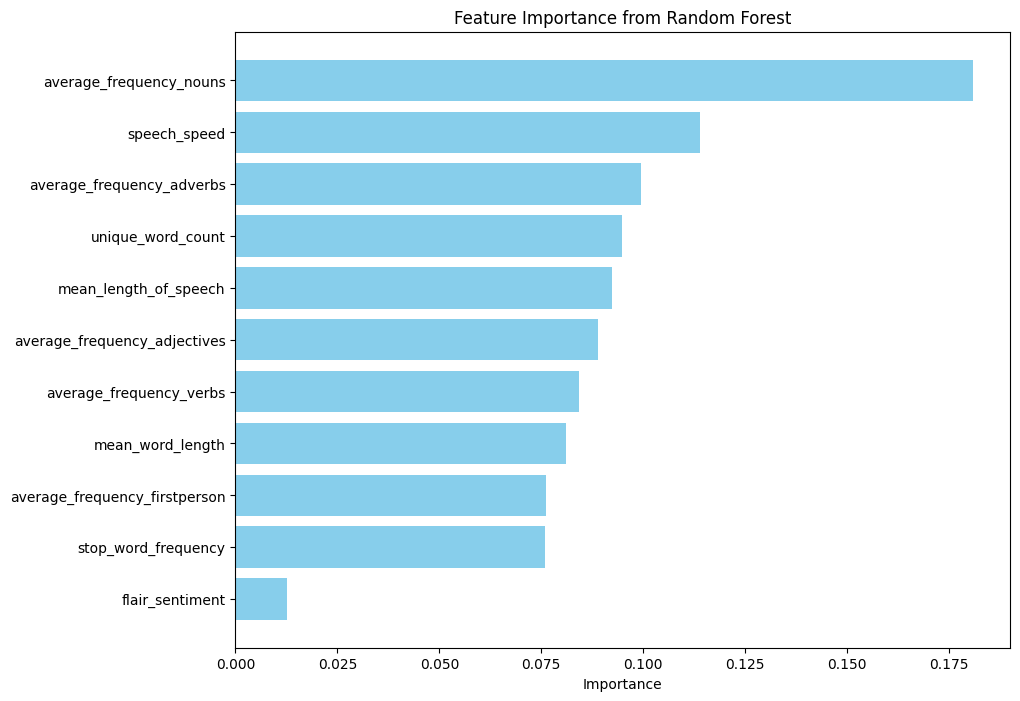

In [23]:
# Feature importance
# Manually defined feature names
feature_names = ['mean_length_of_speech', 'mean_word_length', 'flair_sentiment', 'average_frequency_nouns', 'average_frequency_verbs', 'average_frequency_adjectives', 'average_frequency_adverbs', 'average_frequency_firstperson', 'speech_speed', 'unique_word_count', 'stop_word_frequency']
# Extract feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

### XGBoost


In [24]:
import xgboost as xgb

In [25]:
# Calculate the ratio of the minority class to the majority class
class_counts = np.bincount(y_train)  # Count the occurrences of each class
majority_class_count = class_counts.max()  # Number of samples in the majority class
minority_class_count = class_counts.min()  # Number of samples in the minority class

# Calculate scale_pos_weight (ratio of minority class to majority class)
scale_pos_weight = majority_class_count / minority_class_count

In [26]:
# Define the model
xgboost = xgb.XGBClassifier(eval_metric='mlogloss', 
                            use_label_encoder=False,
                            random_state=RANDOM_SEED,  # Ensure reproducibility in model initialization 
                            scale_pos_weight=scale_pos_weight)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [25, 35, 50, 75, 100, 150, 200],  # number of boosting rounds
    'max_depth': [2, 5, 10, 15, 20],  # maximum depth of each tree
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]  # learning rate (step size)
}

# Set up GridSearchCV with cross-validation for XGBoost
grid_search_xgb = GridSearchCV(xgboost, param_grid=param_grid_xgb, cv=cv_folds, scoring=scoring, refit='f1')
grid_search_xgb.fit(X_train, y_train)

# Output the best parameters based on F1 score and display all metrics
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# View the scores for all metrics (like accuracy, f1, etc.)
cv_results = grid_search_xgb.cv_results_
for metric in ['accuracy', 'f1', 'roc_auc']:
    best_index = grid_search_xgb.best_index_
    print(f"Best {metric.capitalize()} for XGBoost:", cv_results[f'mean_test_{metric}'][best_index])

c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
Best Accuracy for XGBoost: 0.5714285714285714
Best F1 for XGBoost: 0.4027319347319347
Best Roc_auc for XGBoost: 0.5317818181818181


c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
# Get the best estimator (model with the best parameters)
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for XGBoost:", accuracy)

# Generate classification report
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred))

Test Accuracy for XGBoost: 0.4772727272727273

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.70      0.45      0.55        31
           1       0.29      0.54      0.38        13

    accuracy                           0.48        44
   macro avg       0.50      0.50      0.46        44
weighted avg       0.58      0.48      0.50        44



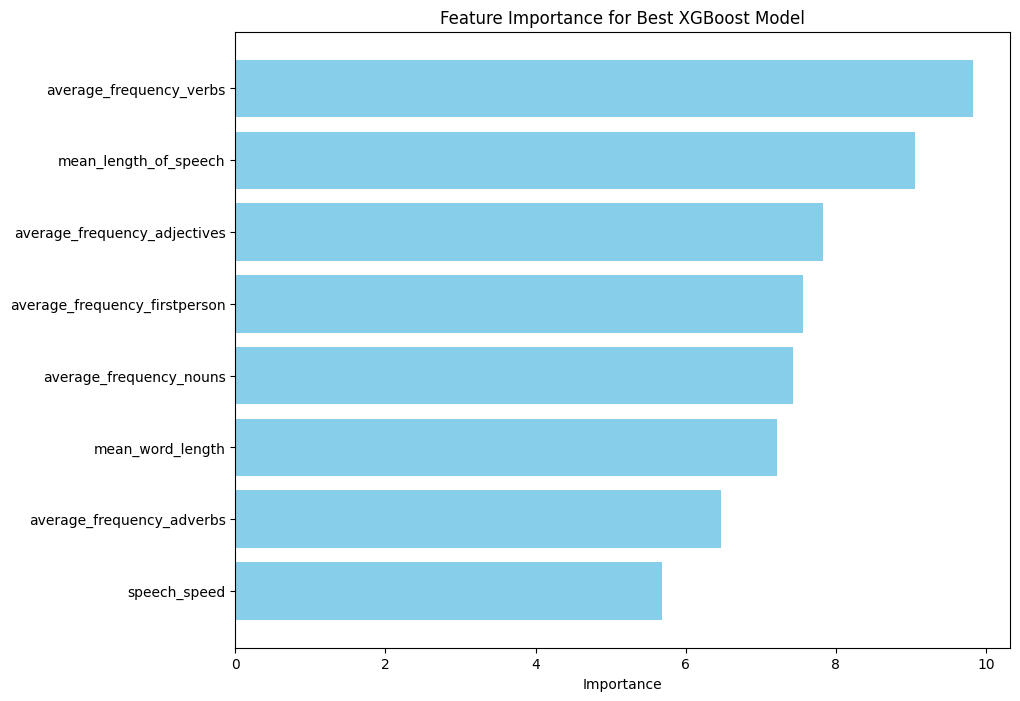

In [28]:
# Feature Importance XGBoost
# Extract feature importances using gain metric
booster = best_xgb_model.get_booster()
feature_importances = booster.get_score(importance_type='gain')

# Map feature importances to the feature names
importance_df = pd.DataFrame({
    'Feature': [feature_names[int(f[1:])] for f in feature_importances.keys()],  # Map f0, f1, ... to names
    'Importance': feature_importances.values()
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance for Best XGBoost Model")
plt.gca().invert_yaxis()  # Flip the chart so the most important feature is at the top
plt.show()

### Support Vector Machine (SVM)
- can perform well in high-dimensional spaces and is effective with a smaller dataset with many features
- can handle class imbalance using the class_weight parameter

In [29]:
# Define the model (Support Vector Machine)
svm = SVC(class_weight='balanced', random_state=RANDOM_SEED, probability=True)  # Use probability=True for roc_auc

# Define the parameter grid for SVM
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf' and 'poly')
}

# Set up GridSearchCV with cross-validation for SVM
grid_search_svm = GridSearchCV(svm, param_grid=param_grid_svm, cv=cv_folds, scoring=scoring, refit='f1')

# Fit the grid search to the training data
grid_search_svm.fit(X_train_norm, y_train)

# Output the best parameters based on F1 score and display all metrics
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# View the scores for all metrics (accuracy, f1, roc_auc)
cv_results = grid_search_svm.cv_results_
for metric in scoring.keys():
    best_index = grid_search_svm.best_index_
    print(f"Best {metric.capitalize()} for SVM:", cv_results[f'mean_test_{metric}'][best_index])

Best Parameters for SVM: {'gamma': 'auto', 'kernel': 'rbf'}
Best Accuracy for SVM: 0.5542857142857144
Best F1 for SVM: 0.45226783968719453
Best Roc_auc for SVM: 0.5835151515151514


In [30]:
# Get the best estimator (model with the best parameters)
best_svm_model = grid_search_svm.best_estimator_

# Evaluate on the test set
y_pred = best_svm_model.predict(X_test_norm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for SVM:", accuracy)

# Generate classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred))

Test Accuracy for SVM: 0.5454545454545454

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.79      0.48      0.60        31
           1       0.36      0.69      0.47        13

    accuracy                           0.55        44
   macro avg       0.57      0.59      0.54        44
weighted avg       0.66      0.55      0.56        44



c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 44/44 [04:13<00:00,  5.76s/it]


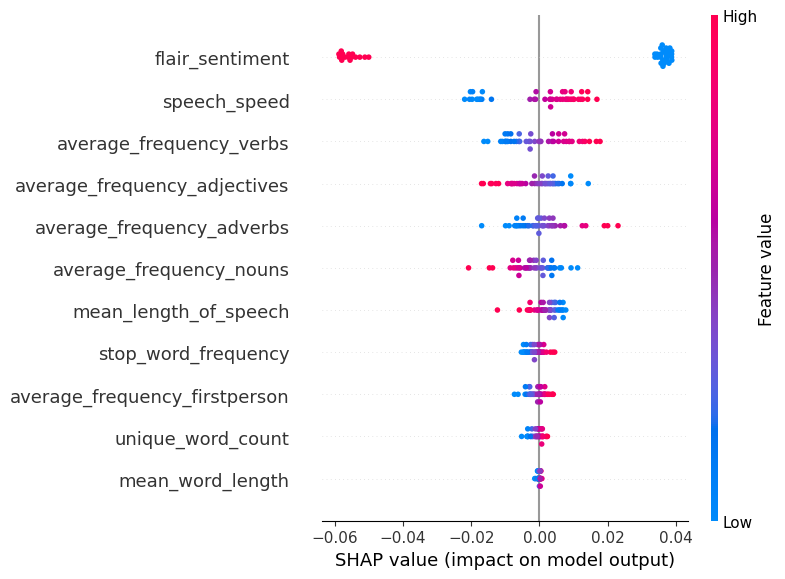

In [31]:
# SHAP for explainability (only linear kernel has built-in interpretability)
import shap

# Initialize the SHAP KernelExplainer with background data
explainer_SVM = shap.KernelExplainer(
    model=best_svm_model.predict_proba,
    data=shap.sample(X_train_norm, 100)  # Use a representative subset of training data as the background
)

# Compute SHAP values for the entire test set
shap_values = explainer_SVM.shap_values(X_test_norm)

# Extract SHAP values for the positive class
shap_values_positive = shap_values[:, :, 1]

# Generate the SHAP summary plot
shap.summary_plot(shap_values_positive, X_test_norm, feature_names=feature_names)

### K-Nearest Neighbors (KNN)
- a simple, instance-based learning algorithm which can be used with weighted classes to address class imbalance

In [32]:
# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Set up GridSearchCV with cross-validation for KNN
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=cv_folds, scoring=scoring, refit='f1')

# Fit the grid search to the training data
grid_search_knn.fit(X_train_norm, y_train)

# Output the best parameters based on F1 score and display all metrics
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# View the scores for all metrics (accuracy, f1, roc_auc)
cv_results = grid_search_knn.cv_results_
for metric in scoring.keys():
    best_index = grid_search_knn.best_index_
    print(f"Best {metric.capitalize()} for KNN:", cv_results[f'mean_test_{metric}'][best_index])

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Accuracy for KNN: 0.6571428571428571
Best F1 for KNN: 0.29391941391941395
Best Roc_auc for KNN: 0.5067515151515152


In [33]:
# Get the best estimator (model with the best parameters)
best_knn_model = grid_search_knn.best_estimator_

# Evaluate on the test set
y_pred = best_knn_model.predict(X_test_norm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for KNN:", accuracy)

# Generate classification report
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred))

Test Accuracy for KNN: 0.75

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        31
           1       0.67      0.31      0.42        13

    accuracy                           0.75        44
   macro avg       0.71      0.62      0.63        44
weighted avg       0.73      0.75      0.72        44



100%|██████████| 44/44 [01:18<00:00,  1.79s/it]


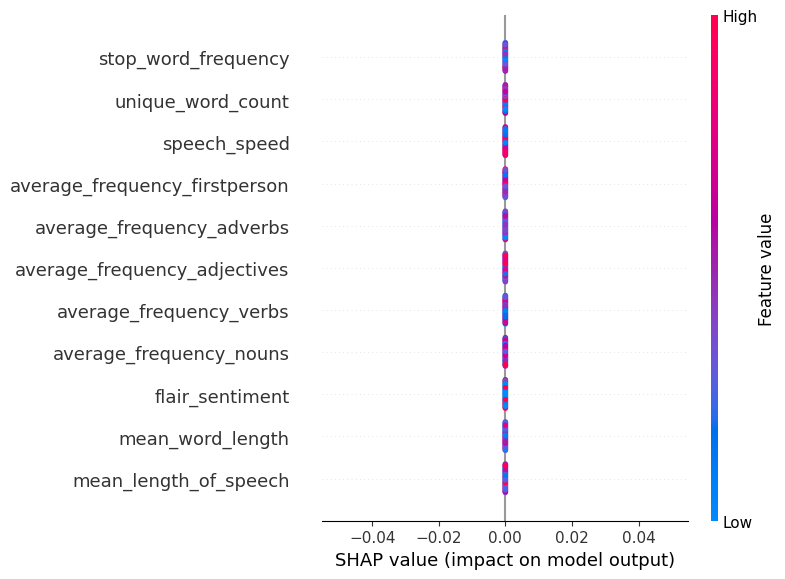

In [34]:
# Initialize SHAP's KernelExplainer with KNN's predict_proba function
explainer_knn = shap.KernelExplainer(
    model=best_knn_model.predict_proba,  # Predict probabilities for classification
    data=shap.sample(X_train, 100)  # Sample training data as the background
)

# Compute SHAP values for all test instances
shap_values = explainer_knn.shap_values(X_test)

# Extract SHAP values for the positive class
shap_values_positive = shap_values[:, :, 1]

# Generate the SHAP summary plot
shap.summary_plot(shap_values_positive, X_test, feature_names=feature_names)

### Gradient Boosting Classifier
- e.g., LightGBM or CatBoost
- powerful ensemble methods that perform well on both imbalanced datasets and large-scale datasets
- flexible and often outperform Random Forest and XGBoost in many scenarios

In [35]:
# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=RANDOM_SEED)

# Define the parameter grid for Gradient Boosting
param_grid_gbc = {
    'n_estimators': [25, 50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.25, 0.2, 0.3, 0.4],  # Step size
    'max_depth': [3, 5, 7, 10]  # Maximum depth of each tree
}

# Set up GridSearchCV with cross-validation for Gradient Boosting
grid_search_gbc = GridSearchCV(gbc, param_grid=param_grid_gbc, cv=cv_folds, scoring=scoring, refit='f1')

# Fit the grid search to the training data
grid_search_gbc.fit(X_train, y_train)

# Output the best parameters based on F1 score and display all metrics
print("Best Parameters for Gradient Boosting:", grid_search_gbc.best_params_)

# View the scores for all metrics (accuracy, f1, roc_auc)
cv_results = grid_search_gbc.cv_results_
for metric in scoring.keys():
    best_index = grid_search_gbc.best_index_
    print(f"Best {metric.capitalize()} for Gradient Boosting:", cv_results[f'mean_test_{metric}'][best_index])

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Accuracy for Gradient Boosting: 0.5828571428571427
Best F1 for Gradient Boosting: 0.3282794500185805
Best Roc_auc for Gradient Boosting: 0.5019666666666667


In [36]:
# Get the best estimator (model with the best parameters)
best_gbc_model = grid_search_gbc.best_estimator_

# Evaluate on the test set
y_pred = best_gbc_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for GBC:", accuracy)

# Generate classification report
print("\nClassification Report for GBC:")
print(classification_report(y_test, y_pred))

Test Accuracy for GBC: 0.6136363636363636

Classification Report for GBC:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        31
           1       0.38      0.46      0.41        13

    accuracy                           0.61        44
   macro avg       0.56      0.57      0.56        44
weighted avg       0.64      0.61      0.62        44



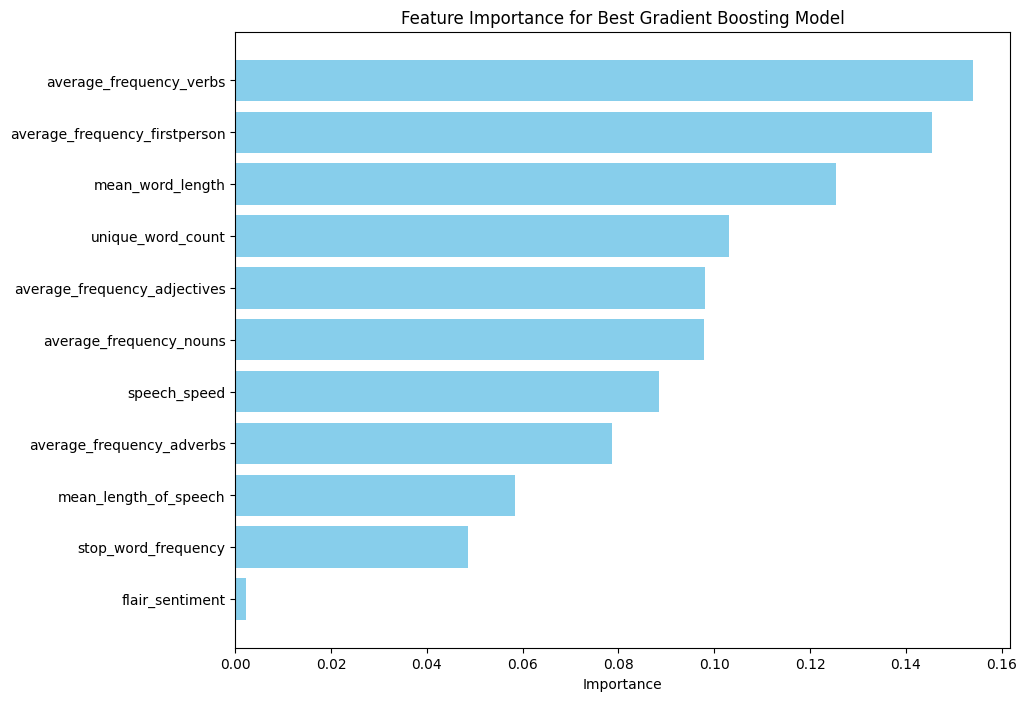

In [37]:
# Extract feature importances
feature_importances = best_gbc_model.feature_importances_

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,  # List of feature names
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance for Best Gradient Boosting Model")
plt.gca().invert_yaxis()  # Flip the chart so the most important feature is at the top
plt.show()

### Balanced Random Forests (BRF)
- a variant of Random Forest that has been explicitly designed to handle class imbalance
- It achieves this by undersampling the majority class when creating trees in each random forest

In [38]:
# Define the model
brf = BalancedRandomForestClassifier(random_state=RANDOM_SEED)

# Define the parameter grid for balanced random forest
param_grid_brf = {
    'n_estimators': [30, 40, 50, 75, 100, 150, 200],  # number of trees
    'max_depth': [None, 5, 10, 15],          # maximum depth of each tree
    'min_samples_split': [5, 10, 20, 30, 40, 50]    # minimum samples required to split a node
}

# Set up GridSearchCV with cross-validation for Balanced Random Forest
grid_search_brf = GridSearchCV(brf, param_grid=param_grid_brf, cv=cv_folds, scoring=scoring, refit='f1')
grid_search_brf.fit(X_train, y_train)

# Output the best parameters based on F1 score and display all metrics
print("Best Parameters for Balanced Random Forest:", grid_search_brf.best_params_)

# View the scores for all metrics
cv_results = grid_search_brf.cv_results_
for metric in scoring.keys():
    best_index = grid_search_brf.best_index_
    print(f"Best {metric.capitalize()} for Balanced Random Forest:", cv_results[f'mean_test_{metric}'][best_index])

c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to

Best Parameters for Balanced Random Forest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 40}
Best Accuracy for Balanced Random Forest: 0.5828571428571429
Best F1 for Balanced Random Forest: 0.4682005963675794
Best Roc_auc for Balanced Random Forest: 0.592278787878788


c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to

In [39]:
# Get the best estimator (model with the best parameters)
best_brf_model = grid_search_brf.best_estimator_

# Evaluate on the test set
y_pred = best_brf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for BRF:", accuracy)

# Generate classification report
print("\nClassification Report for BRF:")
print(classification_report(y_test, y_pred))

Test Accuracy for BRF: 0.5681818181818182

Classification Report for BRF:
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        31
           1       0.33      0.46      0.39        13

    accuracy                           0.57        44
   macro avg       0.53      0.54      0.53        44
weighted avg       0.61      0.57      0.58        44



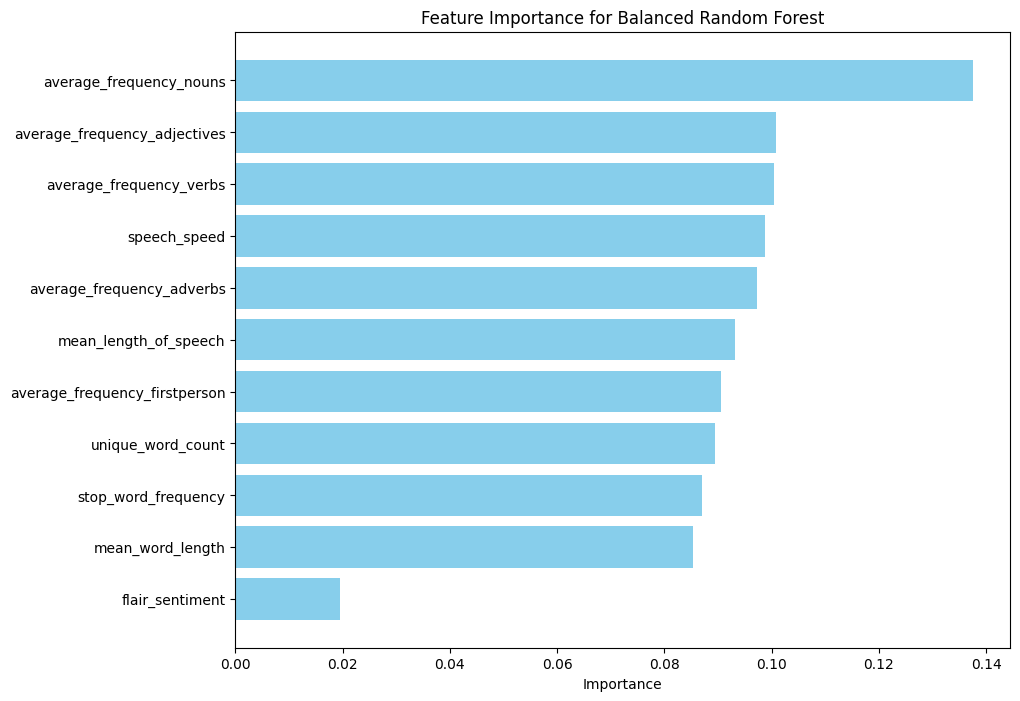

In [40]:
# Extract feature importances from the trained BRF model
feature_importances = best_brf_model.feature_importances_

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,  # List of feature names
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance for Balanced Random Forest")
plt.gca().invert_yaxis()  # Flip the chart so the most important feature is at the top
plt.show()

### Logistic Regression (LR)

In [41]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logreg = LogisticRegression(random_state=RANDOM_SEED, max_iter=1000)

# Define the parameter grid for Logistic Regression
param_grid_logreg = {
    'penalty': ['l1', 'l2'],        # Regularization type (L1, L2)
    'solver': ['liblinear', 'saga'],  # Solvers that support L1 regularization
    'class_weight': [None, 'balanced']  # Class weight options (None or balanced)
}

# Set up GridSearchCV with cross-validation for Logistic Regression
grid_search_logreg = GridSearchCV(logreg, param_grid=param_grid_logreg, cv=cv_folds, scoring=scoring, refit='f1')

# Fit the grid search to the training data
grid_search_logreg.fit(X_train_norm, y_train)

# Output the best parameters based on F1 score and display all metrics
print("Best Parameters for Logistic Regression:", grid_search_logreg.best_params_)

# View the scores for all metrics (like accuracy, f1, etc.)
cv_results = grid_search_logreg.cv_results_
for metric in scoring.keys():
    best_index = grid_search_logreg.best_index_
    print(f"Best {metric.capitalize()} for Logistic Regression:", cv_results[f'mean_test_{metric}'][best_index])


Best Parameters for Logistic Regression: {'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy for Logistic Regression: 0.5828571428571429
Best F1 for Logistic Regression: 0.44532223010483885
Best Roc_auc for Logistic Regression: 0.576321212121212


In [42]:
# Get the best estimator (model with the best hyperparameters)
best_logreg_model = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred = best_logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for Logistic Regression:", accuracy)

# Generate classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Test Accuracy for Logistic Regression: 0.29545454545454547

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.30      1.00      0.46        13

    accuracy                           0.30        44
   macro avg       0.15      0.50      0.23        44
weighted avg       0.09      0.30      0.13        44



c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\katja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [43]:
# Get the coefficients from the trained Logistic Regression model
coefficients = best_logreg_model.coef_[0]  # Assuming binary classification (1D array)

# Create a DataFrame to display the coefficients and their corresponding feature names
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Exponentiate the coefficients for Odds Ratio
})

# Sort by absolute value of coefficient to see the most important features
coeff_df['Abs Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs Coefficient', ascending=False)

print(coeff_df)


                          Feature  Coefficient  Odds Ratio  Abs Coefficient
0           mean_length_of_speech    -1.207647    0.298900         1.207647
5    average_frequency_adjectives    -0.842167    0.430776         0.842167
3         average_frequency_nouns    -0.730240    0.481793         0.730240
6       average_frequency_adverbs     0.725761    2.066304         0.725761
10            stop_word_frequency     0.542393    1.720118         0.542393
4         average_frequency_verbs     0.486745    1.627012         0.486745
2                 flair_sentiment    -0.442982    0.642118         0.442982
8                    speech_speed     0.436906    1.547910         0.436906
9               unique_word_count     0.413700    1.512404         0.413700
1                mean_word_length     0.258540    1.295039         0.258540
7   average_frequency_firstperson     0.137287    1.147157         0.137287
